<h1 style="color:tomato;text-align:center;font-size:300%;font-family:verdana;"> House Sales Prediction </h1>

Below there is data analysis for a new real estate company located in Seattle, WA.<br>
My porpuse is to predict the house sales prices for the King County area.

<table>
  <tr>
    <th style="text-align: left">Feature</th>
    <th style="text-align: left">Description</th> 
  </tr>
  <tr>
    <td style="text-align: left">id</td>
    <td style="text-align: left">Unique ID for each home sold</td> 
  </tr>
  <tr>
    <td style="text-align: left">date</td>
    <td style="text-align: left">Date of the home sale</td> 
  </tr>
    <tr>
    <td style="text-align: left">price</td>
    <td style="text-align: left">Price of each home sold</td> 
  </tr>
    <tr>
    <td style="text-align: left">bedrooms</td>
    <td style="text-align: left">Number of bedrooms</td> 
  </tr>
    <tr>
    <td style="text-align: left">bathrooms</td>
    <td style="text-align: left">Number of bathrooms, where .5 accounts for a room with a toilet but no shower</td> 
  </tr>
    <tr>
    <td style="text-align: left">sqft_living</td>
    <td style="text-align: left">Square footage of the apartments interior living space</td> 
  </tr>
    <tr>
    <td style="text-align: left">sqft_lot</td>
    <td style="text-align: left">Square footage of the land space</td> 
  </tr>
    <tr>
    <td style="text-align: left">floors</td>
    <td style="text-align: left">Number of floors</td> 
  </tr>
    <tr>
    <td style="text-align: left">waterfront</td>
    <td style="text-align: left">A dummy variable for whether the apartment was overlooking the waterfront or not</td> 
  </tr>
    <tr>
    <td style="text-align: left">view</td>
    <td style="text-align: left">An index from 0 to 4 of how good the view of the property was</td> 
  </tr>
    <tr>
    <td style="text-align: left">condition</td>
    <td style="text-align: left">An index from 1 to 5 on the condition of the apartment</td> 
  </tr>
    <tr>
    <td style="text-align: left">grade</td>
    <td style="text-align: left">An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.</td> 
  </tr>
    <tr>
    <td style="text-align: left">sqft_above</td>
    <td style="text-align: left">The square footage of the interior housing space that is above ground level</td> 
  </tr>
    <tr>
    <td style="text-align: left">sqft_basement</td>
    <td style="text-align: left">The square footage of the interior housing space that is below ground level</td> 
  </tr>
    <tr>
    <td style="text-align: left">yr_built</td>
    <td style="text-align: left">The year the house was initially built</td> 
  </tr>
    <tr>
    <td style="text-align: left">yr_renovated</td>
    <td style="text-align: left">The year of the house’s last renovation</td> 
  </tr>
    <tr>
    <td style="text-align: left">zipcode</td>
    <td style="text-align: left">What zipcode area the house is in</td> 
  </tr>
    <tr>
    <td style="text-align: left">lat</td>
    <td style="text-align: left">Lattitude</td> 
  </tr>
    <tr>
    <td style="text-align: left">long</td>
    <td style="text-align: left">Longitude</td> 
  </tr>
    <tr>
    <td style="text-align: left">sqft_living15</td>
    <td style="text-align: left">The square footage of interior housing living space for the nearest 15 neighbors</td> 
  </tr>
    <tr>
    <td style="text-align: left">sqft_lot15</td>
    <td style="text-align: left">The square footage of the land lots of the nearest 15 neighbors</td> 
  </tr>
</table>

### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


It’s historical pricing data for house sales in King County, USA (where Seattle is).

---
# Exploratory Data Analysis

### Check for null values

In [4]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Generate Descriptive Statistics of the data 

In [5]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Print distribution plot of the price column

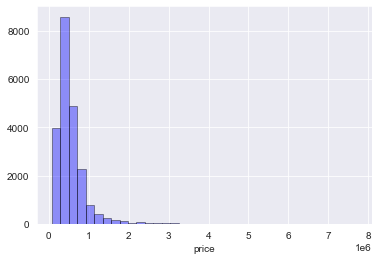

In [6]:
sns.distplot(data['price'], hist = True, kde=False,
           bins=int(180/5), color='blue',
           hist_kws={'edgecolor':'black'})

### conclusions
1. The most common prices are around 100,000. 
2. The outliers are above 200,000.

### Print countplot of the bedroom numbers

Text(0.5, 1.0, 'count of bedrooms')

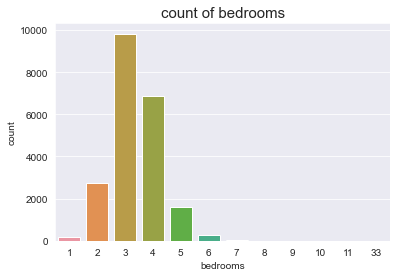

In [7]:
sns.countplot(x = data['bedrooms'])
plt.title("count of bedrooms", fontsize=15)

### Print the correlations of the features with the price and sort the values

In [8]:
data[data.columns[1:]].corr()['price'][:]

price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
waterfront       0.266398
view             0.397370
condition        0.036056
grade            0.667951
sqft_above       0.605368
sqft_basement    0.323799
yr_built         0.053953
yr_renovated     0.126424
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64

### Print scatterplot of the square feet living with the actual price

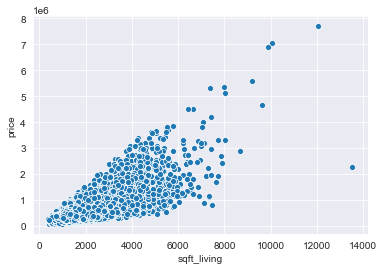

In [9]:
sns.scatterplot(x='sqft_living', y='price', data=data)

### Print boxplot of the bedroom category

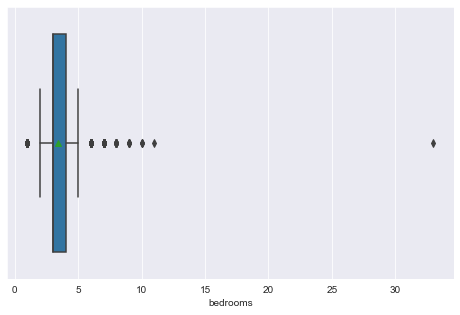

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(x=data['bedrooms'],showmeans=True);
plt.show()
data.groupby(['bedrooms'])

conclusion:
7 outliers as the number of the black dots.

---
## Geographical Properties

### Print scatterplot of the longitude with the actual price

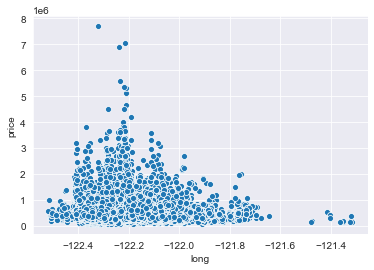

In [11]:
sns.scatterplot(x='long', y='price', data=data)

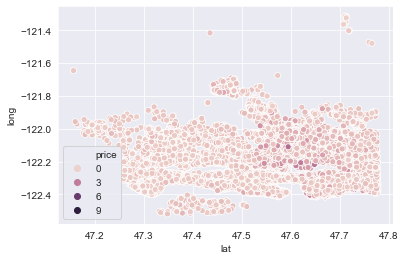

In [12]:
sns.scatterplot(x='lat', y='long',hue='price', data=data)

conclusions:
1. In contrast to the other plot, This plot shows that most of the houses are between 47.55 and 47.77
2. The conbination of both plot can tell us the exact location of the house (streets and neibourhod)

### Sort the data in descending order based off price

In [13]:
data.sort_values('price', ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0,0,...,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500


### How many houses is 1% of all houses

In [14]:
data['id'].value_counts().sum()*0.01

215.97

### Create new dataframe containing the bottom 99% of the data

In [15]:
bottom_99=data[216:] # 21,597 * 0.01 = 216
bottom_99

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
216,46100204,2/21/2015,1510000.0,5,3.00,3300,33474,1.0,0,3,...,9,1870,1430,1957,1991,98040,47.5673,-122.210,3836,20953
217,1909600046,7/3/2014,445838.0,3,2.50,2250,5692,2.0,0,0,...,8,2250,0,2000,0,98146,47.5133,-122.379,1320,5390
218,1250202145,8/28/2014,1070000.0,2,2.25,3900,14864,1.0,0,3,...,8,1950,1950,1947,0,98144,47.5884,-122.291,2580,5184
219,7611200125,10/23/2014,467000.0,2,1.50,1320,10800,1.0,0,0,...,8,1320,0,1947,0,98177,47.7145,-122.367,2120,12040
220,5611500140,8/22/2014,686000.0,4,2.50,2760,6440,2.0,0,0,...,10,2760,0,1999,0,98075,47.5836,-122.026,3070,8127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### Print scatterplot of the latitude and longitude against the price

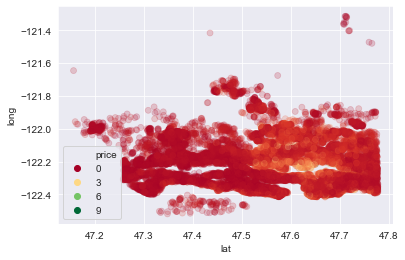

In [16]:
sns.scatterplot(x='lat', y='long',hue='price',edgecolor=None,alpha=0.2,palette='RdYlGn',data=bottom_99)

conclusion:
Most of the prices are the same value (color=red), so we can conclude that most of the houses are at the same price.

___
## Other Features

### Print boxplot of the waterfront prices

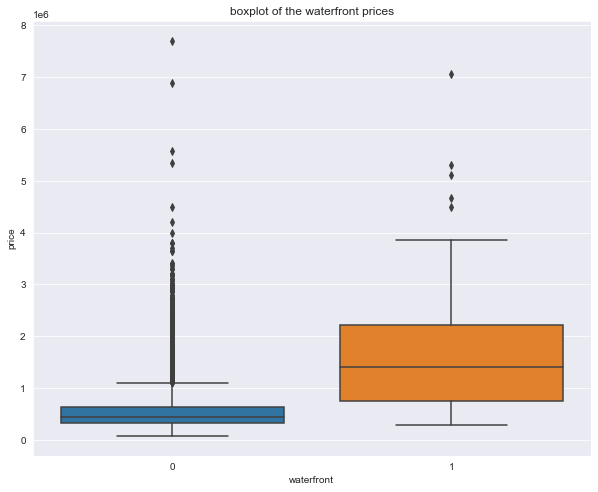

In [17]:
plt.figure(figsize=(10,8))
sns.boxplot(x='waterfront',y='price',data=data)
plt.title("boxplot of the waterfront prices");

___
# Feature Engineering

### Print the head of the original Dataframe

In [18]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [19]:
data.drop('id',axis=1,inplace=True)
data.dtypes['date']

dtype('O')

### Convert the date column to datetime object

In [20]:
data['date'] = pd.to_datetime(data.date)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

### Create 2 new columns for the year and month

In [21]:
data['year']=data['date'].dt.strftime('%Y')
data['month']=data['date'].dt.strftime('%m')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,02
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,02


### Print boxplot of the prices per month

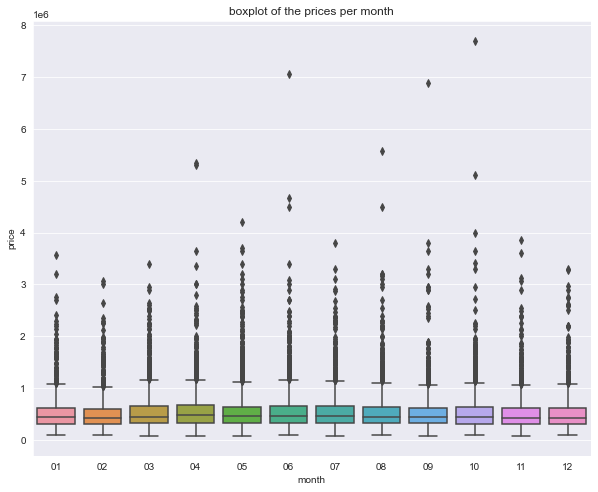

In [22]:
plt.figure(figsize=(10,8))
sns.boxplot(x='month',y='price',data=data)
plt.title("boxplot of the prices per month");

conclusion:
There is no a specific month where the sales are higher.

### Print the average prices per month

In [23]:
pd.options.display.float_format = '{:.2f}'.format
data.groupby(data['date'].dt.strftime('%m')).mean().price

date
01   525963.25
02   508520.05
03   544057.68
04   562215.62
05   550849.75
06   557534.32
07   544892.16
08   536655.21
09   529723.52
10   539439.45
11   522359.90
12   524799.90
Name: price, dtype: float64

### Print plot of the groupby above

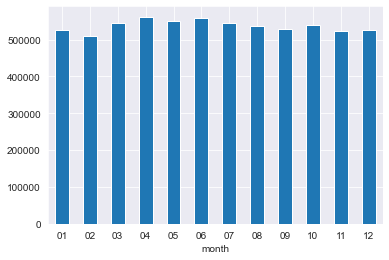

In [24]:
data['price'] = data['price'].astype('float')
data.groupby('month')['price'].mean().plot(kind='bar', rot=0)

### Print plot of the average prices per year 

In [25]:
pd.options.display.float_format = '{:.2f}'.format
data.groupby(data['date'].dt.strftime('%Y')).mean().price

date
2014   539350.91
2015   542279.01
Name: price, dtype: float64

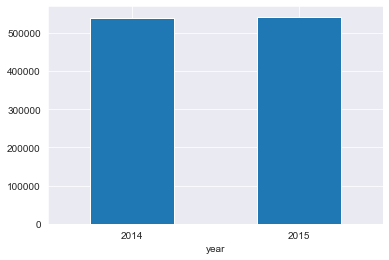

In [26]:
data['price'] = data['price'].astype('float')
data.groupby('year')['price'].mean().plot(kind='bar', rot=0)

There is no a trend.

### Drop the date column

In [27]:
data.drop('date',axis=1,inplace=True)

### Count the values of the zipcode column 

In [28]:
groupby_data=data.groupby('zipcode').count().price
print('Total values of zipcodes:', groupby_data.count())

Total values of zipcodes: 70


In [29]:
data.drop('zipcode',axis=1,inplace=True)

In [30]:
data.groupby(data['yr_renovated']).count().price

yr_renovated
0       20683
1934        1
1940        2
1944        1
1945        3
        ...  
2011       13
2012       11
2013       37
2014       91
2015       16
Name: price, Length: 70, dtype: int64

### Count the values of the squre feet of the basement column 

In [31]:
data.groupby(data['sqft_basement']).count().price

sqft_basement
0       13110
10          2
20          1
40          4
50         11
        ...  
3260        1
3480        1
3500        1
4130        1
4820        1
Name: price, Length: 306, dtype: int64

### Split the Data to training set and test set

In [32]:
X = data.drop('price',axis=1)
y = data['price']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Check the shape of X_train and X_test

In [34]:
print(X_train.shape)
print(X_test.shape)

(15117, 19)
(6480, 19)


___
# Algorithm

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [37]:
print(f'Coefficient: {lr.coef_}')
print(f'Intercept: {lr.intercept_}')

Coefficient: [-3.28623409e+04  4.47720815e+04  1.00256269e+02  8.80631298e-02
 -2.52158541e+03  5.90363016e+05  4.76075631e+04  3.53448689e+04
  1.00617188e+05  6.89551579e+01  3.13011111e+01 -2.40844407e+03
  2.04385914e+01  5.66157837e+05 -1.15272962e+05  3.12321534e+01
 -3.81082933e-01  3.71607339e+04  1.14878188e+03]
Intercept: -111876595.25975622


In [38]:
pd.options.display.float_format = '{:.3f}'.format
cdf = pd.DataFrame(lr.coef_,X.columns,columns=['Coeff'])
cdf

,Coeff
bedrooms,-32862.341
bathrooms,44772.081
sqft_living,100.256
sqft_lot,0.088
floors,-2521.585
waterfront,590363.016
view,47607.563
condition,35344.869
grade,100617.188
sqft_above,68.955


In [39]:
y_pred = lr.predict(X_test)

___
# Evaluation

In [40]:
from sklearn import metrics

In [41]:
print('MAE:', "%.4f" % metrics.mean_absolute_error(y_test, y_pred))

MAE: 124412.7314


In [42]:
print('MSE:', "%.4f" % metrics.mean_squared_error(y_test, y_pred))

MSE: 44505490494.3214


In [43]:
print('RMSE:', "%.4f" % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 210963.2444


In [44]:
print('R2:', "%.4f" % metrics.r2_score(y_test, y_pred))

R2: 0.6980


___
# Conclusion

I predict that the company should build in the cheap area witch is island.
As we can see, the most common houses are incluse 3 bedrooms.
Acording to the scatterplots, I can advise two options - 
The first one is to bulid houses in the most common area, and the second option is to develope the cheaper area witch is waterfront.
However,the times of buliding dosn't matter.